In [4]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser(
    "~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[3637]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")



Top predictions:

           snake: 65.31%
          turtle: 12.29%
    sweet_pepper: 3.83%
          lizard: 1.88%
       crocodile: 1.75%


(-0.5, 31.5, 31.5, -0.5)

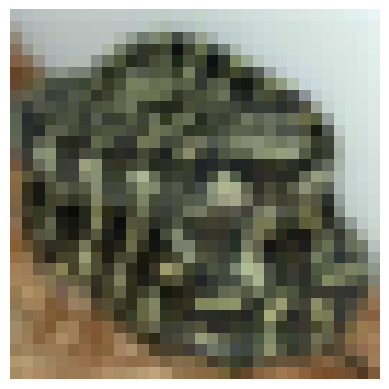

In [8]:
# display the cifar100 image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')

In [15]:
from tqdm import tqdm

In [16]:
# Embed all images from CIFAR-100 dataset
all_image_features = []

for i in tqdm(range(len(cifar100))):
    image, _ = cifar100[i]
    image_input = preprocess(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        image_features /= image_features.norm(dim=-1, keepdim=True)
    
    all_image_features.append(image_features.cpu())

# Convert list to tensor
all_image_features = torch.cat(all_image_features)

print("Embedded all images from CIFAR-100 dataset.")

100%|██████████| 10000/10000 [05:22<00:00, 31.05it/s]


Embedded all images from CIFAR-100 dataset.


In [30]:
len(all_image_features)


10000

In [35]:
len(set(all_image_features))

10000

In [ ]:
# print out vectors to a text file, each vector on a new line
with open("cifar100_vectors.txt", "w") as f:
    for vector in all_image_features:
        f.write(" ".join([str(x) for x in vector.tolist()]) + "\n")

In [38]:
cifar100 = CIFAR100(root=os.path.expanduser(
    "~/.cache"), download=True, train=False)

In [40]:
type(cifar100)

torchvision.datasets.cifar.CIFAR100

In [41]:
i, _ = cifar100[0]
type(i)

PIL.Image.Image